In [1]:
import pandas as pd

In [2]:
# importando o arquivo csv e lendo com o PANDAS
df = pd.read_csv("../data/raw/olist_order_reviews_dataset.csv")

In [3]:
df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [4]:
# selecionando as colunas válidas para o projeto
selected = df[['review_score', 'review_comment_message']]

In [5]:
selected_na = selected.dropna()

In [6]:
dataframe = pd.DataFrame(selected_na)

In [7]:
# passando as palavras pa minúsculo
dataframe['review_comment_message'] = dataframe['review_comment_message'].str.lower()

In [8]:
dataframe

,review_score,review_comment_message
3,5,recebi bem antes do prazo estipulado.
4,5,parabéns lojas lannister adorei comprar pela i...
9,4,aparelho eficiente. no site a marca do aparelh...
12,4,"mas um pouco ,travando...pelo valor ta boa.\r\n"
15,5,"vendedor confiável, produto ok e entrega antes..."
...,...,...
99205,4,para este produto recebi de acordo com a compr...
99208,5,entregou dentro do prazo. o produto chegou em ...
99215,3,"o produto não foi enviado com nf, não existe v..."
99221,5,"excelente mochila, entrega super rápida. super..."


In [9]:
#!pip install unidecode

In [10]:
import unidecode
import unicodedata

In [11]:
# passando a coluna para lista
lista = list(dataframe['review_comment_message'])

In [12]:
# removendo acentuação com o unicodedata
novalista = []
for item in lista:
    item = unicodedata.normalize("NFD", item)
    novalista.append(item.encode("ascii", 'ignore').decode("utf-8"))

In [13]:
# removendo os números 
import re
padrao = re.compile(r'\d+')
novalista2 = []
for item in novalista:
    novalista2.append(padrao.sub('', item))

In [14]:
# removendo os caracteres especiais
novalista3 = []
for item in novalista2:
    novalista3.append(re.sub(r'[^a-zA-Z0-9]', ' ', item))

In [15]:
# removendo o nome das Casas de Game of Thrones
# casas = ['lannister','stark','targaryen','greyjoy','baratheon','martell','tyrell','bolton']
    
padrao = re.compile(r'lannister|stark|targaryen|greyjoy|baratheon|martell|tyrell|bolton')
novalista4 = []
for item in novalista3:
    novalista4.append(padrao.sub('', item))

In [16]:
# importando a biblioteca NLTK para utilizar a lista de stopwords e stemming
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('portuguese')
#nltk.download('rslp')

In [17]:
#nltk.download('stopwords')
#nltk.download('rslp')

In [18]:
# função para remover as stopwords 
def removerStopwords (frases):
    novalista5 = []
    for item in frases:
        add = [p for p in item.split() if p not in stopwords]
        novalista5.append(add)
    return novalista4

novalista5 = removerStopwords(novalista4)

In [19]:
# removendo stopwords e fazendo o STEMMING (retirada dos sufixos)
def aplicaStemmer(texto):
    stemmer = nltk.stem.RSLPStemmer()
    semsufixo = []
    for frases in texto:
        comsufixo = [str(stemmer.stem(p)) for p in frases.split() if p not in stopwords]
        semsufixo.append(comsufixo)
    return semsufixo

novalista6 = aplicaStemmer(novalista4)

In [20]:
# criando uma lista com as frases completas
novalista7 = []
for item in novalista6:
    item = ' '.join(item)
    novalista7.append(item)

In [21]:
# criando um dataframe a partir da última lista tratada
toDataframe = pd.DataFrame(novalista7)

In [22]:
# adicionando uma nova coluna com os dados tratados
dataframe['dados tratados'] = toDataframe.values

In [23]:
# removendo as linhas com score 3
dataframe = dataframe[dataframe['review_score'] != 3]

In [24]:
dataframe

,review_score,review_comment_message,dados tratados
3,5,recebi bem antes do prazo estipulado.,receb bem ant praz estipul
4,5,parabéns lojas lannister adorei comprar pela i...,parab loj ador compr internet segur pra parab ...
9,4,aparelho eficiente. no site a marca do aparelh...,aparelh efici sit marc aparelh impress desinfe...
12,4,"mas um pouco ,travando...pelo valor ta boa.\r\n",pouc trav val ta boa
15,5,"vendedor confiável, produto ok e entrega antes...",vend confia produt ok entreg ant praz
...,...,...,...
99203,2,tive um problema na entrega em que o correio c...,problem entreg correi coloc sit entreg dia nao...
99205,4,para este produto recebi de acordo com a compr...,produt receb acord compr realiz
99208,5,entregou dentro do prazo. o produto chegou em ...,entreg dentr praz produt cheg condico perfeit ...
99221,5,"excelente mochila, entrega super rápida. super...",excel mochil entreg sup rap sup recom loj


In [25]:
#criando as categorias, positivo e negativo
dataframe['target'] = dataframe['review_score'].apply(lambda x: 0 if x < 3 else 1) #[msgs['review_score']>= 4]

<ipython-input-25-a3013126fe49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['target'] = dataframe['review_score'].apply(lambda x: 0 if x < 3 else 1) #[msgs['review_score']>= 4]


In [26]:
import string
from tqdm.auto import tqdm
cont = 0
x_data = []
y_data = []
for star,review,review_tratado,target in tqdm((dataframe).values):
    x_data.append(review_tratado)
    y_data.append(target)
    cont += 1

  0%|          | 0/37420 [00:00<?, ?it/s]

Bag of Words

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
vectorizer = CountVectorizer()

In [29]:
X = vectorizer.fit_transform(x_data)

In [30]:
(vectorizer.get_feature_names())

['aa',
 'aaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa',
 'aaguard',
 'aaind',
 'aanch',
 'aaprelh',
 'ab',
 'abaix',
 'abajour',
 'abajur',
 'abandon',
 'abaul',
 'abc',
 'abdom',
 'abel',
 'abenco',
 'abert',
 'abir',
 'abisurd',
 'abo',
 'abolc',
 'abon',
 'abord',
 'aborec',
 'aborrec',
 'abr',
 'abrac',
 'abri',
 'abrig',
 'abril',
 'absolut',
 'absorca',
 'absorv',
 'absurd',
 'absurdoo',
 'absurs',
 'abus',
 'ac',
 'aca',
 'acab',
 'acabement',
 'acabent',
 'acam',
 'acar',
 'acarret',
 'acat',
 'acdor',
 'aceit',
 'aceita',
 'aceitaca',
 'acel',
 'aceler',
 'acend',
 'acent',
 'acerc',
 'acert',
 'aces',
 'acess',
 'acessi',
 'acessori',
 'acetin',
 'acgu',
 'ach',
 'achacolat',
 'acheg',
 'acid',
 'acim',
 'acinzent',
 'acion',
 'aco',
 'acolcho',
 'acolh',
 'acomod',
 'acompanh',
 'acompanhac',
 'acompanhav',
 'acompr',
 'aconcheg',
 'acondic',
 'acondicion',
 'aconpanh',
 'aconselh',
 'acontac',
 'acontec',
 'aconteci',
 'acopi',
 'acopl',
 'acord',
 'acordad

In [36]:
np.unique(X.toarray()[0])

array([0, 1], dtype=int64)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [37]:
gnb     = GaussianNB()
svm     = make_pipeline(StandardScaler(), SVC(gamma='auto'))
tree    = DecisionTreeClassifier(random_state=0)
rForest = RandomForestClassifier(max_depth=10, random_state=0)

clfs    = [(gnb,'Gaussian'),(rForest,'rForest'),(tree,'Tree'),(svm,'SVM')]
#(svm,'SVM'),

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y_data, test_size=0.3, random_state=0)

In [85]:
accrs = []
preds = []
for clf,name in tqdm(clfs):
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    accrs.append(accuracy_score(y_test, y_pred))
    preds.append(preds)
    results = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred)
    ppv.append(results.PPV)
    tpr.append(results.TPR)
    f1.append(results.F1)
    mcc.append(results.MCC)
    auc.append(results.AUC)
    print(accuracy_score(y_test, y_pred),name)

  0%|          | 0/4 [00:00<?, ?it/s]

0.7780153215749154 Gaussian
0.7602886157135221 rForest
0.8818813468733298 Tree
0.8996971316586496 SVM


In [ ]:
#https://www.americanas.com.br/produto/3234381133?pfm_page=search&pfm_pos=grid&pfm_type=search_page&cor=Cloud%20Navy
#https://catalogo-bff-v2-americanas.b2w.io/graphql?operationName=productReviews&variables=%7B%22productId%22%3A%223234381133%22%2C%22offset%22%3A112%2C%22filters%22%3Anull%2C%22sort%22%3A%22Helpfulness%3Adesc%22%7D&extensions=%7B%22persistedQuery%22%3A%7B%22version%22%3A1%2C%22sha256Hash%22%3A%22fdc9e92cb4f538144d2e5f659bdba0ceaaf6cf03a4220438acc7f8327e92bef8%22%7D%7D

In [41]:
import matplotlib.pyplot as plt
def confusionMatrix(real, prediction):
    classes = np.unique(real)
    nClasses = len(classes)
    cm = np.zeros((nClasses, nClasses))
    cmNorm = []
    print(cmNorm)
    for i in range(len(real)):
        indexReal, = np.where(classes == real[i])
        indexReal = indexReal[0]
        indexPred, = np.where(classes == prediction[i])
        indexPred = indexPred[0]
        cm[indexReal][indexPred] = cm[indexReal][indexPred] + 1
    cmNorm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm = np.array(cm,dtype=int)
    return cm, cmNorm

def plotCM(cm, classes,normalize=False,title=None,cmap=plt.cm.cool):
  
    if normalize == True:
      title = "Normalized"+title
    else:
      title = "No normalized"+title
      
    fig, ax = plt.subplots(figsize=(8,8))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),

           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")


    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# ensemble Leaning training and testing 

In [40]:

#from sklearn import MultinomialNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import metrics
from pycm import *

clf1 = svm.SVC(gamma='scale')
clf2 = RandomForestClassifier(n_estimators=500, random_state=1)
#clf3 = MultinomialNB(alpha=0.01)
clf4 = DecisionTreeClassifier(random_state=0, max_depth=500)
ppv,tpr,f1,mcc,auc = [],[],[],[],[]
model = VotingClassifier(estimators=[
     ('svm', clf1),('rf', clf2), ('mnb', gnb), ('tree', clf4)], voting='hard',weights=[2,2,2,1])
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accr = metrics.accuracy_score(y_test, y_pred)
results = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred)
print(accr,results.PPV,results.TPR,results.F1,results.MCC,results.AUC)

0.9291822554783539 {0: 0.8623688155922039, 1: 0.9574198453934862} {0: 0.8953922789539228, 1: 0.9427252308460194} {0: 0.8785703375591875, 1: 0.9500157183275699} {0: 0.8289024255650093, 1: 0.8289024255650093} {0: 0.9190587548999711, 1: 0.9190587548999711}


[]


<AxesSubplot:title={'center':'Normalized- Análise de sentimento'}, xlabel='Predicted label', ylabel='True label'>

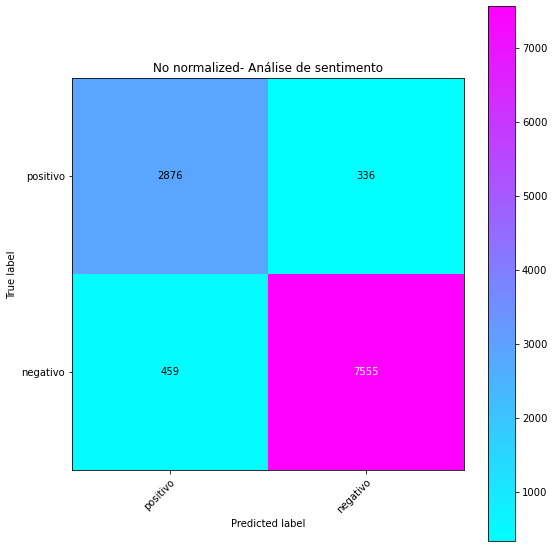

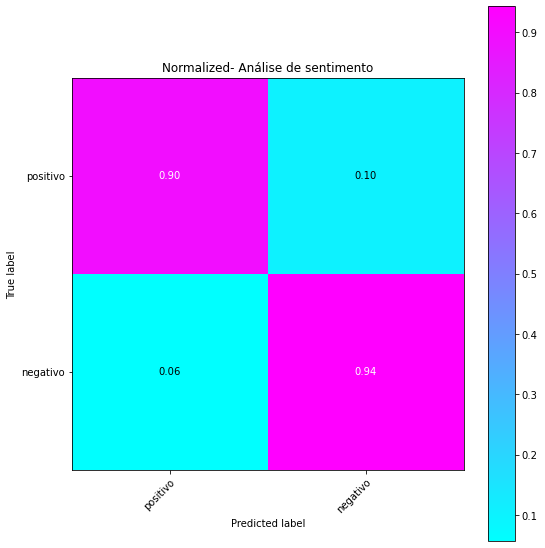

In [42]:
classes = ['positivo','negativo']
cm, norm = confusionMatrix(y_test, y_pred)
plotCM(cm, classes, False, "- Análise de sentimento")
plotCM(norm, classes, True, "- Análise de sentimento")

In [ ]:
df = pd.read_csv("../data/raw/olist_order_reviews_dataset.csv")

In [2]:
import os

In [7]:
os.listdir('../data/raw/Americanas-coments')

['A0',
 'A100',
 'A106',
 'A112',
 'A12',
 'A18',
 'A24',
 'A30',
 'A36',
 'A42',
 'A48',
 'A54',
 'A6',
 'A60',
 'A66',
 'A72',
 'A78',
 'A84',
 'A90',
 'A96']

In [35]:
i

'A54'

In [53]:
#pd.read_json('../data/raw/Americanas-coments/'+i).values[0][0]['reviews']['result']

In [49]:
x_data_americanas,y_data_americanas = [],[]
for i in os.listdir('../data/raw/Americanas-coments'):
    json_aux = pd.read_json('../data/raw/Americanas-coments/'+i).values[0][0]['reviews']['result']
    for j in json_aux:
        x = j['review']
        y = j['rating']
        x_data_americanas.append(x)
        y_data_americanas.append(y)

In [51]:
#!pip install pycm

# Dados americanas - Comentarios

In [54]:
x_data_americanas,y_data_americanas = [],[]
for i in os.listdir('../data/raw/Americanas-coments'):
    json_aux = pd.read_json('../data/raw/Americanas-coments/'+i).values[0][0]['reviews']['result']
    for j in json_aux:
        x = j['review']
        y = j['rating']
        x_data_americanas.append(x)
        y_data_americanas.append(y)